In [3]:
import numpy as np
import matplotlib.pyplot as plot
from scipy import signal

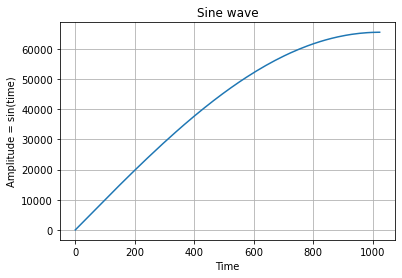

In [4]:
log_base_two = 10
N=2**log_base_two
OW = 16

multiplier = 2**OW-1

n        = np.arange(0, N);
amplitude   = (multiplier*np.sin(2*np.pi*(2*(n/4.0)+0)/(2*N))).astype(int)
plot.plot(n, amplitude)
plot.title('Sine wave')
plot.xlabel('Time')
plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.show()


In [5]:
max(amplitude), max(n)

(65534, 1023)

In [6]:
total_cycles = 3*4*N
total_cycle_array = [None]*total_cycles
for i in range(total_cycles):
    half_bit = i>>(log_base_two+1) & 1
    quarter_bit = i>>(log_base_two-0) &1

    if quarter_bit:
        idx = ~i
    else:
        idx = i
        
    if half_bit:
        total_cycle_array[i] = -amplitude[idx&(2**log_base_two-1)]
    else:
        total_cycle_array[i] = amplitude[idx&(2**log_base_two-1)]

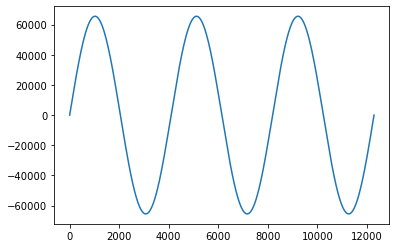

In [7]:
plot.plot(np.arange(0, total_cycles), total_cycle_array)


In [8]:
1024>>(log_base_two-2)

4

In [9]:
log_base_two

10

C:\Users\nebst\anaconda3\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 32768 is greater than input length  = 12288, using nperseg = 12288
  warnings.warn('nperseg = {0:d} is greater than input length '


Text(0, 0.5, 'Power')

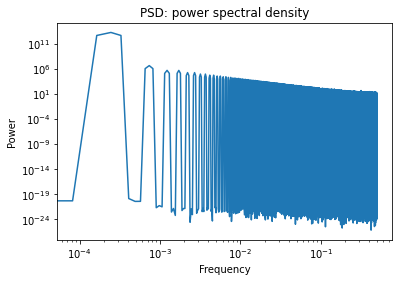

In [10]:
freqs, psd = signal.welch(total_cycle_array,nperseg=8192*4)

plot.loglog(freqs, psd)
plot.title('PSD: power spectral density')
plot.xlabel('Frequency')
plot.ylabel('Power')


In [296]:
with open("quarterwav.hex", "w") as f: 
    for idx, sample in enumerate(amplitude):
        f.write("@"+format(idx, 'x')+" "+ format(sample, 'x')+"\n") 


In [18]:
with open("quarterwav.v", "w") as f:
    f.write("module quarterwav(clk, addr, data);\n")
    f.write("  input wire clk;\n") 
    f.write("  input wire ["+str(log_base_two-1)+":0] addr;\n") 
    f.write("  output reg ["+str(OW-1)+":0] data;\n") 
    f.write("  always @(posedge clk) begin\n") 
    f.write("    case (addr)\n") 
    
    for idx, sample in enumerate(amplitude):
        f.write("      "+str(idx) + " : data <= "+str(OW)+"'d"+str(sample)+";\n") 
    
    f.write("      default : data <= "+str(OW)+"'d0;\n") 
    f.write("    endcase\n") 
    f.write("  end\n") 
    f.write("endmodule\n") 